In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

import geopandas as gpd

In [2]:
LaTimes_Neighborhoods=gpd.read_file('data/CountyNeighborhoods.geojson', crs={'init': 'epsg:4326'})
LaTimes_Neighborhoods.drop(labels=list(*np.where(LaTimes_Neighborhoods.city != 'los-angeles')), inplace=True)
NC_Neighborhoods=gpd.read_file('data/Neighborhoods.geojson', crs={'init': 'epsg:4326'})
FD_Neighborhoods=gpd.read_file('data/LAFD_Districts.geojson', crs={'init': 'epsg:4326'})

for k in FD_Neighborhoods.iloc[0].metadata.keys():
    FD_Neighborhoods[k.capitalize()]=FD_Neighborhoods.metadata.apply(lambda i: i[k]).astype(int)

w, s, e, n = LaTimes_Neighborhoods.total_bounds
bg_map, ext = ctx.bounds2img(w, s, e, n, 12, url='http://c.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png', ll=True)

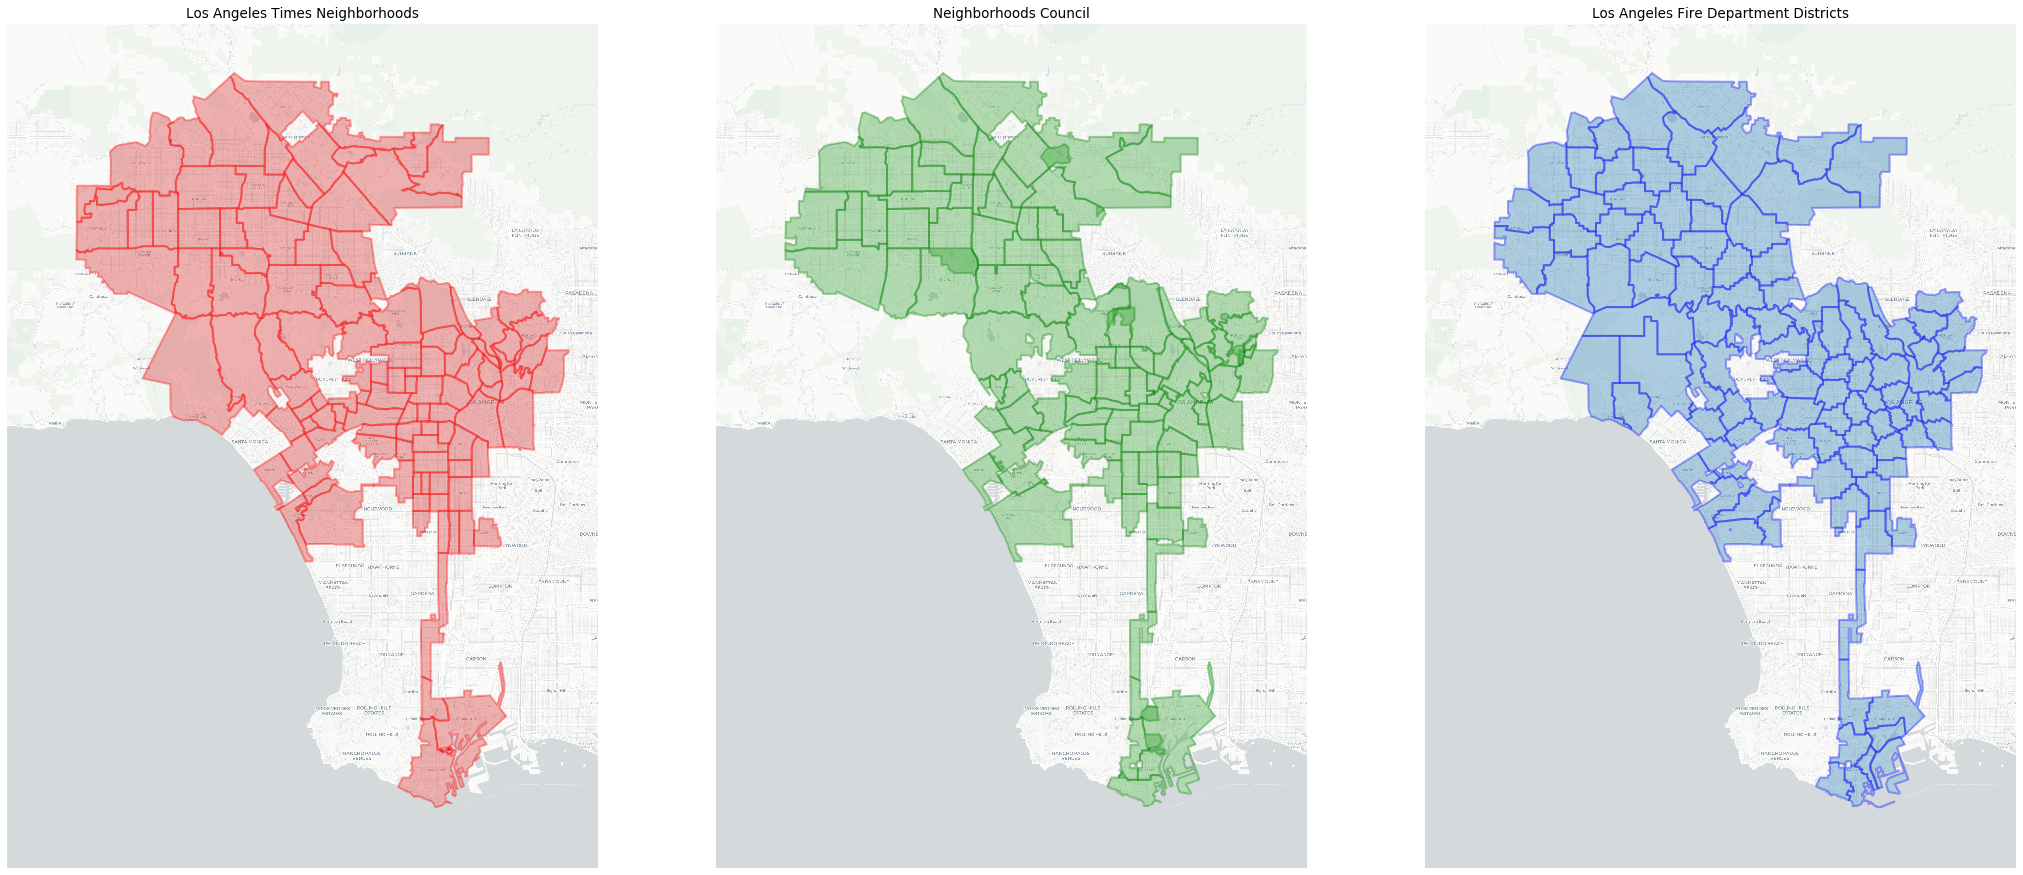

In [4]:
size=1.5
fig, axes = plt.subplots(ncols=3, figsize=(8*3*size,12*size))

for idx,ax in enumerate(axes):
    ax.imshow(bg_map, extent=ext)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_title(['Los Angeles Times Neighborhoods',
                  'Neighborhoods Council',
                  'Los Angeles Fire Department Districts'][idx], fontsize=9*size)
    ax.set_axis_off()
    
LaTimes_Neighborhoods.to_crs(3857).plot(ax=axes[0], linewidth=2, edgecolor='r', facecolor='tab:red', alpha=0.35)
NC_Neighborhoods.to_crs(3857).plot(ax=axes[1], linewidth=2, edgecolor='g', facecolor='tab:green', alpha=0.35)
FD_Neighborhoods.to_crs(3857).plot(ax=axes[2], linewidth=2, edgecolor='b', facecolor='tab:blue', alpha=0.35);

In [548]:
print('Divisions: {}'.format(*FD_Neighborhoods.Division.value_counts().shape))
print('Battalions: {}'.format(*FD_Neighborhoods.Battalion.value_counts().shape))
print('Firstins: {}'.format(*FD_Neighborhoods.Firstin.value_counts().shape))

Divisions: 3
Battalions: 16
Firstins: 102


In [549]:
# Ummmmmmm... yeah
# Basically, this gets the areas where the Firstin district # has repeats

repeats=FD_Neighborhoods.iloc[
    np.where(FD_Neighborhoods.Firstin.isin(
                [idx for idx,t in (FD_Neighborhoods.Firstin.value_counts() > 1).items() if t == True]
            ))]

repeats

,kind,external_id,name,slug,set,metadata,resource_uri,geometry,Division,Battalion,Firstin
37,LAFD First-in District,37,37,lafd-first-in-district-37,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 1, 'BATTALION': 9, 'FIRSTIN': '37'}",/1.0/boundary/lafd-first-in-district-37/,"MULTIPOLYGON (((-118.44864 34.04930, -118.4481...",1,9,37
38,LAFD First-in District,37,37,lafd-first-in-district-37-2,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 1, 'BATTALION': 9, 'FIRSTIN': '37'}",/1.0/boundary/lafd-first-in-district-37-2/,"MULTIPOLYGON (((-118.45711 34.04834, -118.4624...",1,9,37
43,LAFD First-in District,41,41,lafd-first-in-district-41-2,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 1, 'BATTALION': 5, 'FIRSTIN': '41'}",/1.0/boundary/lafd-first-in-district-41-2/,"MULTIPOLYGON (((-118.34286 34.08528, -118.3499...",1,5,41
44,LAFD First-in District,41,41,lafd-first-in-district-41,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 1, 'BATTALION': 5, 'FIRSTIN': '41'}",/1.0/boundary/lafd-first-in-district-41/,"MULTIPOLYGON (((-118.34116 34.10779, -118.3417...",1,5,41
59,LAFD First-in District,58,58,lafd-first-in-district-58,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 18, 'FIRSTIN': '58'}",/1.0/boundary/lafd-first-in-district-58/,"MULTIPOLYGON (((-118.38780 34.02904, -118.3909...",2,18,58
60,LAFD First-in District,58,58,lafd-first-in-district-58-2,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 18, 'FIRSTIN': '58'}",/1.0/boundary/lafd-first-in-district-58-2/,"MULTIPOLYGON (((-118.37954 34.07641, -118.3757...",2,18,58
65,LAFD First-in District,62,62,lafd-first-in-district-62,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 4, 'FIRSTIN': '62'}",/1.0/boundary/lafd-first-in-district-62/,"MULTIPOLYGON (((-118.43227 34.02398, -118.4290...",2,4,62
66,LAFD First-in District,62,62,lafd-first-in-district-62-2,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 4, 'FIRSTIN': '62'}",/1.0/boundary/lafd-first-in-district-62-2/,"MULTIPOLYGON (((-118.40448 33.98846, -118.4070...",2,4,62
68,LAFD First-in District,64,64,lafd-first-in-district-64,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 13, 'FIRSTIN': '64'}",/1.0/boundary/lafd-first-in-district-64/,"MULTIPOLYGON (((-118.30518 33.94547, -118.3051...",2,13,64
69,LAFD First-in District,64,64,lafd-first-in-district-64-2,/1.0/boundary-set/lafd-first-in-districts/,"{'DIVISION': 2, 'BATTALION': 13, 'FIRSTIN': '64'}",/1.0/boundary/lafd-first-in-district-64-2/,"MULTIPOLYGON (((-118.25420 33.92939, -118.2535...",2,13,64


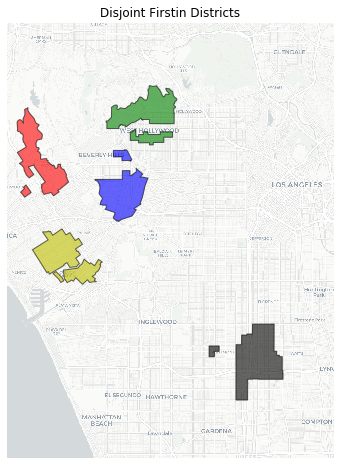

In [550]:
fig, ax = plt.subplots(figsize=(8,8))

repeat_map, repeat_ext = ctx.bounds2img(*repeats.total_bounds, 12, url='http://c.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png', ll=True)
ax.imshow(repeat_map, extent=repeat_ext)
ax.axis('off')
ax.set_title('Disjoint Firstin Districts', fontsize=12)

for idx, groups in enumerate(repeats.groupby('Firstin')):
    _, g = groups
    g.to_crs(3857).plot(ax=ax, facecolor='rgbyk'[idx], linewidth=1, edgecolor='k', alpha=0.6)


In [669]:
df=pd.read_csv('data/All_Stations_Response_Metrics.csv')

cols=pd.Series(df.columns).iloc[np.where(~df.columns.str.extract(r'.*(TURNOUT|TRAVEL).*').isna()[0])]
for idx in cols:
    df[idx]=df[idx].apply(lambda i: pd.to_timedelta(i).seconds)

df.rename(columns=dict(zip(np.setdiff1d(df.columns, cols), np.array(list(map(lambda i: i.capitalize(), np.setdiff1d(df.columns, cols)))))), inplace=True)
df.rename(columns=dict(zip(cols, ['Turnout_Time_NonEMS', 'Turnout_Time_EMS', 'Travel_Time_NonEMS', 'Travel_Time_EMS'])), inplace=True)
df['District']=df['District'].astype('category')
df['Year']=df['Year'].astype('category')

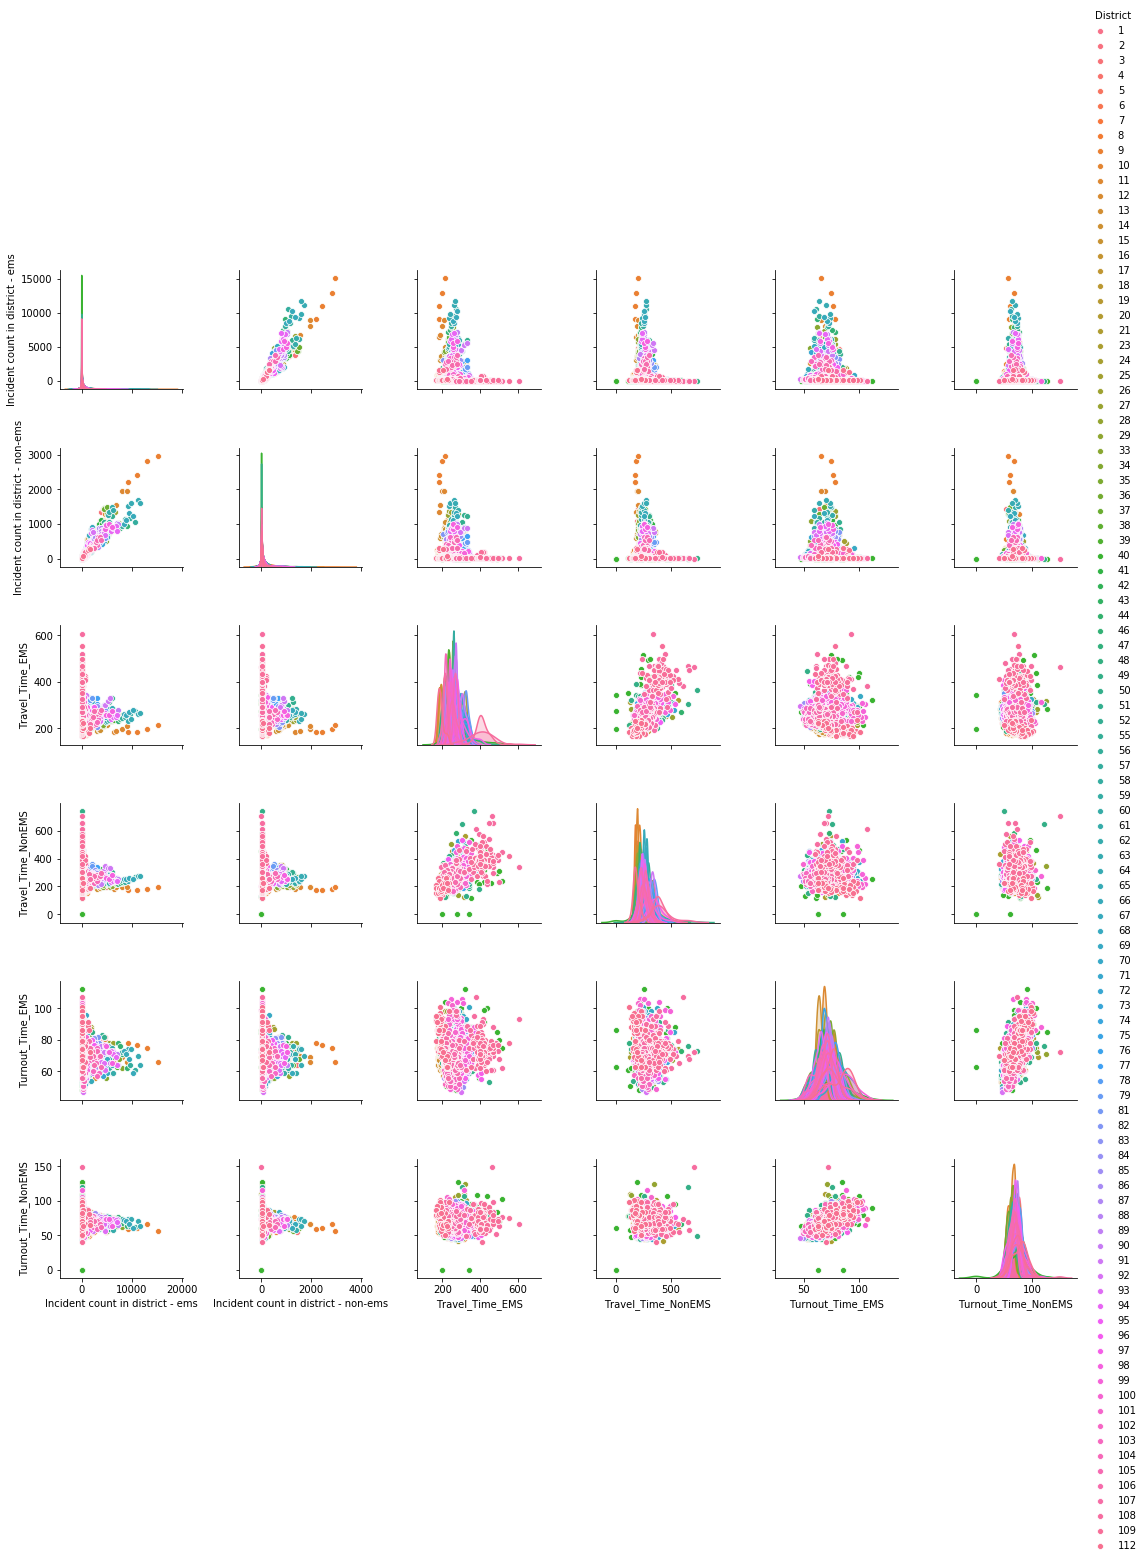

In [681]:
sns.pairplot(df, , vars=np.setdiff1d(df.select_dtypes(include=[np.number]).columns, {'District', 'Year'}));

In [658]:
df.iloc[np.where(df.Month == 'Overall 2017')]

,Year,District,Month,Turnout_Time_NonEMS,Turnout_Time_EMS,Travel_Time_NonEMS,Travel_Time_EMS,Incident count in district - non-ems,Incident count in district - ems
5306,2017,1,Overall 2017,61,60,312,318,122,419
5309,2017,2,Overall 2017,56,60,245,261,113,721
5312,2017,3,Overall 2017,54,57,213,260,253,829
5315,2017,4,Overall 2017,56,62,238,268,141,1060
5318,2017,5,Overall 2017,59,67,313,319,100,435
...,...,...,...,...,...,...,...,...,...
5597,2017,106,Overall 2017,73,64,313,291,54,418
5600,2017,107,Overall 2017,64,62,220,223,46,307
5603,2017,108,Overall 2017,54,65,576,395,24,34
5606,2017,109,Overall 2017,59,71,420,399,39,118
